In [84]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import font_manager as fm
from pathlib import Path

In [127]:
base_dir = Path("D:/APMC-price-predictor")
font_path = base_dir / "NotoSerifGujarati-Black.ttf"
guj_fonts = fm.FontProperties(fname=font_path)

In [128]:
# Load the data (Replace 'commodities_price_data.csv' with your file path)
file_path = base_dir / "data/commodities/temp.csv"
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Display the first few rows to confirm the structure
print("Dataset preview:")
print(data.head())

commodity_name = 'મગફળી 66'  # Example: Gujarati for Wheat
commodity_data = data[data['Item Name'] == commodity_name]
size_commodity_data = commodity_data.shape[0]
print(size_commodity_data)

Dataset preview:
                Item Name  Low Price  Average Price  High Price
Date                                                           
04-09-2024   કપાસ બી. ટી.       1051           1621        1661
04-09-2024      ઘઉં લોકવન        540            580         598
04-09-2024      ઘઉં ટુકડા        540            560         662
04-09-2024     મગફળી જીણી        871           1141        1256
04-09-2024  સિંગદાણા જાડા       1101           1511        1621
27


C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Glyph 2734 (\N{GUJARATI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Matplotlib currently does not support Gujarati natively.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Glyph 2711 (\N{GUJARATI LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Glyph 2731 (\N{GUJARATI LETTER PHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Glyph 2739 (\N{GUJARATI LETTER LLA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ladan\AppData\Local\Temp\ipykernel_16600\3172919090.py:31: UserWarning: Glyph 2752 (\N{GUJARATI VOWEL SIGN II}) missing from font(s) DejaVu Sa

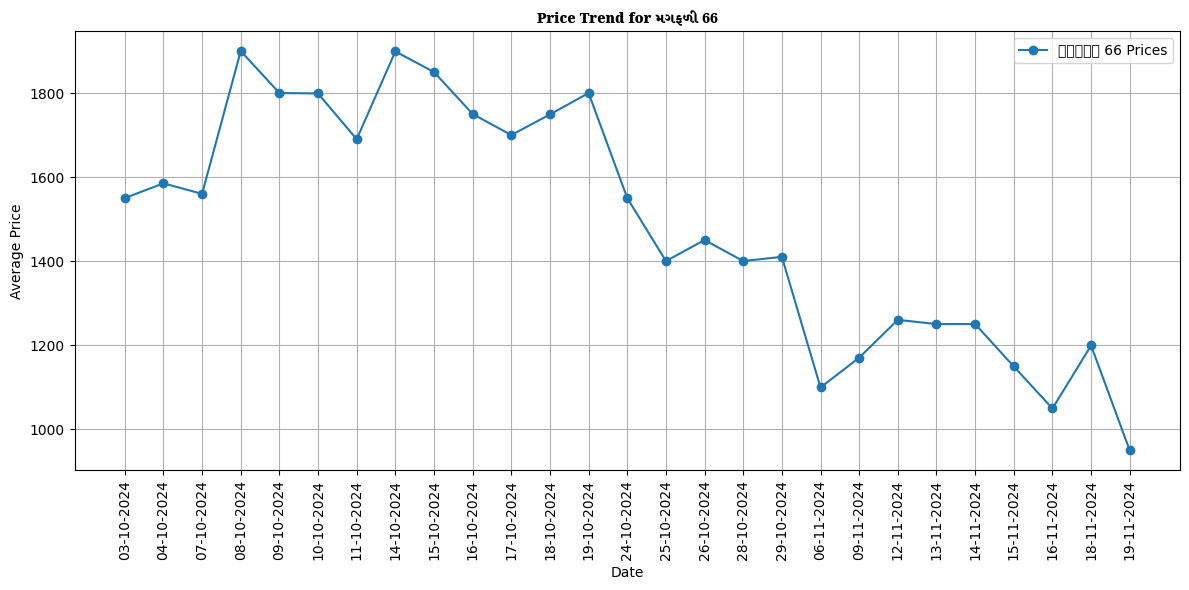

In [129]:
# Check if any data exists for the selected commodity
if commodity_data.empty:
  print(f"No data found for the commodity: {commodity_name}")

else:
  # Extract the 'Average Price' column for the selected commodity
  price_data = commodity_data['Average Price']
  # price_data.index = pd.to_datetime(price_data.index, format='%d-%m-%Y')
  # Get the last date in the dataset
  # latest_date = price_data.index.max()
  #print(latest_date)

  # Calculate the start date for the last 3 months
  # three_months_ago = latest_date - pd.DateOffset(months=3)
  #print(three_months_ago)

  # Filter the data for plotting
  # filtered_data = price_data[price_data.index >= three_months_ago]
  #print(filtered_data)


  # Plot the raw price data for the selected commodity
  plt.figure(figsize=(12, 6))
  plt.plot(price_data.index, price_data, label=f'{commodity_name} Prices', marker='o', linestyle='-')
  plt.title(f'Price Trend for {commodity_name}', fontproperties=guj_fonts)
  plt.xlabel('Date')
  plt.ylabel('Average Price')
  plt.xticks(rotation=90)
  plt.legend()
  plt.grid()
  plt.tight_layout()
  plt.show()

In [130]:
# Step 1: Stationarity Check
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("\nADF Test Results:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("The series is stationary (no further differencing needed).")
        return True
    else:
        print("The series is not stationary (differencing is required).")
        return False


Checking stationarity for the raw price data:

ADF Test Results:
ADF Statistic: -0.7995
p-value: 0.8193
Critical Value 1%: -3.8591
Critical Value 5%: -3.0420
Critical Value 10%: -2.6609
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -2.0027
p-value: 0.2854
Critical Value 1%: -3.9240
Critical Value 5%: -3.0685
Critical Value 10%: -2.6739
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -1.9187
p-value: 0.3233
Critical Value 1%: -3.8591
Critical Value 5%: -3.0420
Critical Value 10%: -2.6609
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -1.1586
p-value: 0.6912
Critical Value 1%: -3.9644
Critical Value 5%: -3.0849
Critical Value 10%: -2.6818
The series is not stationary (differencing is required).

ADF Test Results:
ADF Statistic: -0.4070
p-value: 0.9089
Critical Value 1%: -4.0689
Critical Value 5%: -3.1271
Critical Value 10%: -2.7017
The series is not stationa

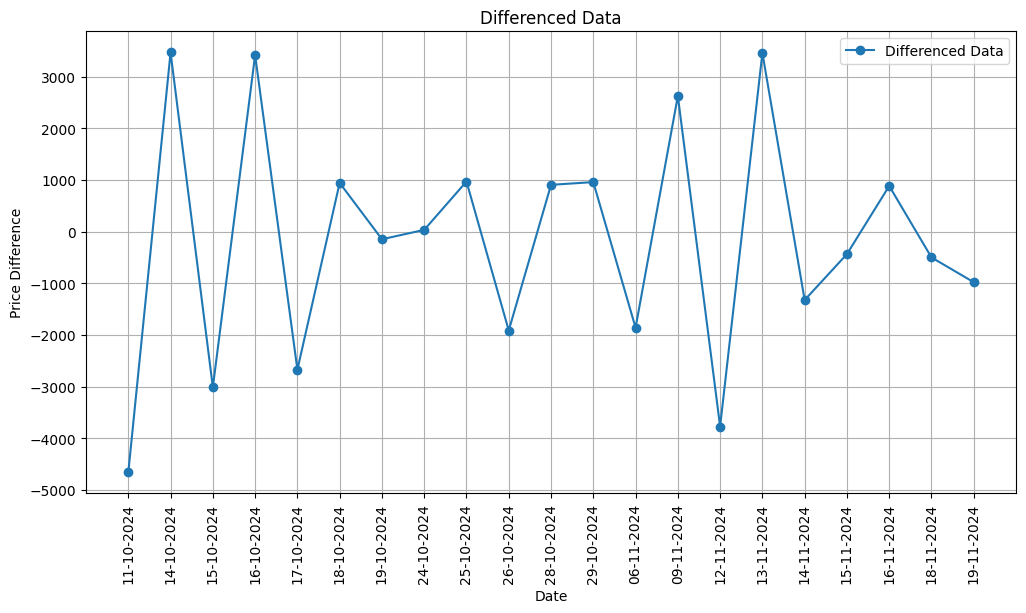

In [131]:
# Step 2: Differencing (if necessary)
print("Checking stationarity for the raw price data:")
d = 0
price_diff = price_data
while True:
  if check_stationarity(price_diff):
    # price_diff = price_data
    print(f"Data is stationary with d={d}.")
    break
  else:
    price_diff = price_diff.diff().dropna()
    d += 1
# if check_stationarity(price_data):
#   price_diff = price_data
# else:
#   price_diff = price_data.diff().dropna()  # Apply differencing to make the series stationary

print("\nChecking stationarity for the differenced data:")
check_stationarity(price_diff)
# print(d)

# filtered_price_diff = price_diff[price_diff.index >= three_months_ago]  # For differenced data

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(price_diff, label='Differenced Data', marker='o', linestyle='-')
plt.title('Differenced Data')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

Significant spikes in ACF (q): 1 at lags [1]
Significant spikes in PACF (p): 5 at lags [1 2 4 7 9]


<Figure size 1200x600 with 0 Axes>

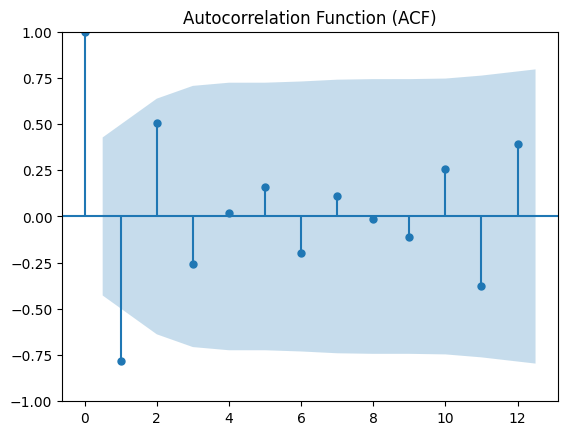

Can't plot the acf/pacf plots for મગફળી 66 due to Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 10.


<Figure size 1200x600 with 0 Axes>

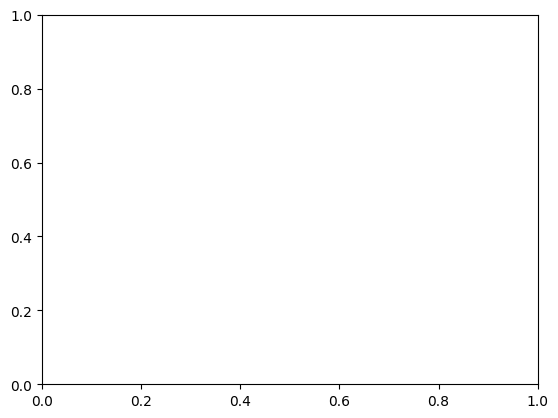

In [132]:
# Step 3: Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_values, acf_confint = acf(price_diff, alpha=0.05)
pacf_values, pacf_confint = pacf(price_diff, alpha=0.05)

# Function to count significant lags
def count_significant_spikes(values, confint):
    # The significant lags are those outside the confidence interval
    significant_lags = np.where(np.abs(values) > confint[:, 1])[0]
    return len(significant_lags), significant_lags

# Count significant spikes for ACF (q)
q, significant_acf_lags = count_significant_spikes(acf_values, acf_confint)

# Count significant spikes for PACF (p)
p, significant_pacf_lags = count_significant_spikes(pacf_values, pacf_confint)

print(f"Significant spikes in ACF (q): {q} at lags {significant_acf_lags}")
print(f"Significant spikes in PACF (p): {p} at lags {significant_pacf_lags}")

# ACF and PACF Plots
try:
    plt.figure(figsize=(12, 6))
    plot_acf(price_diff, lags=(size_commodity_data//2)-1, title="Autocorrelation Function (ACF)")
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(price_diff, lags=(size_commodity_data//2)-1, title="Partial Autocorrelation Function (PACF)")
    plt.show()
   
except Exception as e:
    print(f"Can't plot the acf/pacf plots for {commodity_name} due to {e}")

# Explanation:
# - ACF (Autocorrelation Function): Measures the correlation between a series and its lagged values.
# - PACF (Partial Autocorrelation Function): Measures the correlation between a series and its lagged values,
#   removing the influence of intermediate lags.
# - Use these plots to decide on p (AR term) and q (MA term).

In [133]:
# Step 4: Fit the ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Choose p, d, q based on ACF and PACF (example values)
# p, d, q = 5, 0, 2  # Adjust based on ACF/PACF analysis
if p > 15:
    p = min(5, q)
if q > 15: 
    q = min(5, p)
if d > 5:
    d = 1
print(f"\nFitting ARIMA model with order ({p}, {d}, {q})...")
model = ARIMA(price_data, order=(p, d, q))
results = model.fit()

# Explanation of results.summary():
# - Coefficients: Parameters of AR, I, and MA terms.
# - P-values: Check if terms are statistically significant (p < 0.05).
# - AIC/BIC: Lower values indicate a better fit.


Fitting ARIMA model with order (5, 1, 1)...


c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [134]:
# Step 5: Analyze Model Summary
print("\nARIMA Model Summary:")
print(results.summary())


ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:          Average Price   No. Observations:                   27
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -159.681
Date:                Tue, 04 Feb 2025   AIC                            333.362
Time:                        15:53:45   BIC                            342.168
Sample:                             0   HQIC                           335.898
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4018      0.331     -1.214      0.225      -1.051       0.247
ar.L2          0.0098      0.260      0.038      0.970      -0.500       0.520
ar.L3         -0.0595      0.2

Overview of the Summary Output
Dep. Variable: The dependent variable is the time series being modeled, in this case, "Average Price."
No. Observations: The total number of observations in the dataset (87).
Model: The specified ARIMA model, in this case, ARIMA(8, 1, 3), meaning:

p=8 (number of autoregressive terms),

d=1 (degree of differencing),

q=3 (number of moving average terms).

Log Likelihood: A measure of the likelihood of the observed data given the model; higher values indicate a better fit.


Information Criteria
AIC (Akaike Information Criterion): 1159.521. Lower AIC values suggest a better fit of the model to the data, penalizing for the number of parameters.
BIC (Bayesian Information Criterion): 1188.973. Similar to AIC but includes a stronger penalty for the number of parameters.
HQIC (Hannan-Quinn Information Criterion): 1171.374. Another criterion used for model comparison, typically used when the sample size is small.


Coefficient Estimates
The table displays the estimated coefficients for the AR and MA terms, along with their standard errors, z-scores, p-values, and confidence intervals:
coef: Estimated coefficient for each term (e.g., ar.L1, ma.L1).
std err: Standard error of the coefficient estimate.
z: The z-score for the hypothesis test that the coefficient is zero.
P>|z|: The p-value associated with the z-score. A value less than 0.05 generally indicates statistical significance.
[0.025, 0.975]: The 95% confidence interval for the coefficient estimate.


Key Points from Coefficient Table
Significant Terms:
ar.L3 has a p-value of 0.028, indicating it is statistically significant.
ar.L5 has a p-value of 0.084, which is borderline significant.
Other coefficients have higher p-values, suggesting they are not statistically significant.

Variance Estimate
sigma2: The estimated variance of the residuals (errors) in the model (3.541e+04), along with its standard error and confidence interval.

Diagnostic Tests
Ljung-Box Test: A test for autocorrelation in the residuals.

Q: Test statistic (0.00), indicating no autocorrelation.
Prob(Q): Probability associated with the Q statistic (0.95), suggesting that we cannot reject the null hypothesis of no autocorrelation.
Jarque-Bera Test: A test for normality of the residuals.

Prob(JB): The probability value (0.01) indicates the residuals are not normally distributed.
Heteroskedasticity Test (H): Tests for changing variance in the residuals.

Prob(H): A p-value of 0.00 indicates the presence of heteroskedasticity.

In [135]:
# Step 6: In-sample Predictions
pred = results.get_prediction(start=0, end=len(price_data)-1)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

In [136]:
# Step 7: Forecast Future Prices
forecast_steps = 10
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ladan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


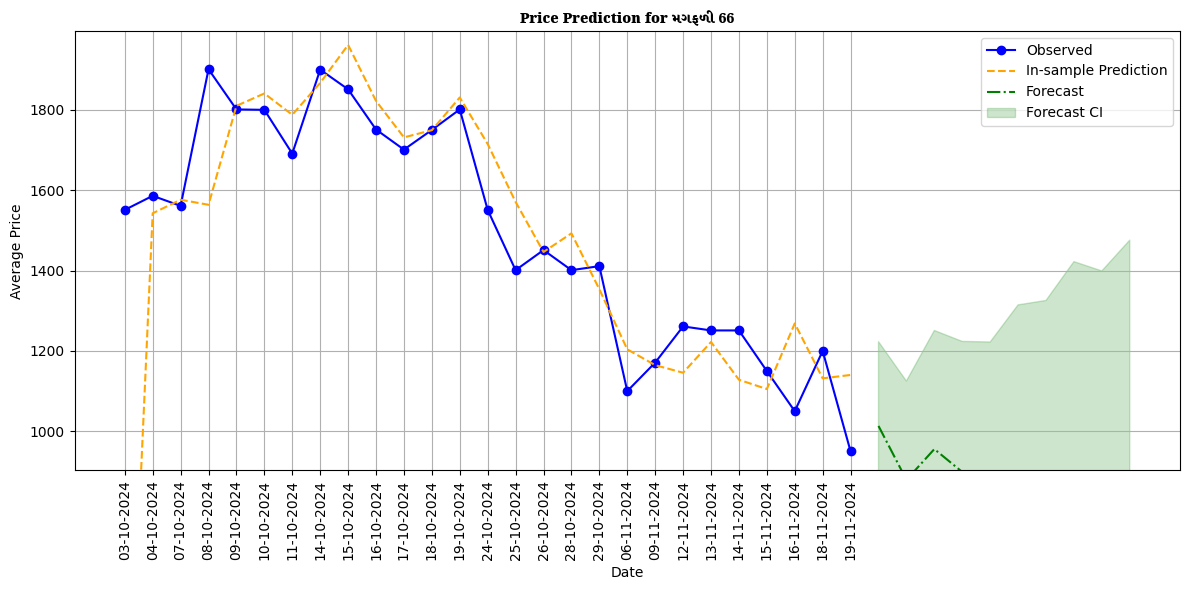

In [137]:
# Step 8: Plot the Results with Detailed Y-Axis (Zoomed-In)
plt.figure(figsize=(12, 6))

# Plot observed prices
plt.plot(price_data.index, price_data, label='Observed', marker='o', linestyle='-', color='blue')

# Plot in-sample predictions
plt.plot(pred_mean.index, pred_mean, label='In-sample Prediction', color='orange', linestyle='--')

# Plot forecasted prices
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='green', linestyle='-.')

# Add confidence intervals for forecasts
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='green', alpha=0.2, label='Forecast CI')

# Adjust the y-axis range based on observed and forecasted prices
plt.ylim(price_data.min() * 0.95, price_data.max() * 1.05)

# Graph labels and legend
plt.title(f'Price Prediction for {commodity_name}', fontproperties=guj_fonts)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()